# Exploratory Analysis of Amazon Movie Reviews

Over time, I am interested in exploring Natural Language Processing vertical of Data Science. To perform preliminary analytics, I have filtered emails, reviews, comments as potential data sources. My natural inclination towards Amazon Datasets has been due to the product based categorization of the reviews. To elaborate, I would be fascinated to analyze Movies, Books, Arts and many more together.

I would like to present techniques and results to the following research questions

1) Which reviews are more helpful than others?

    1.A) Are reviews of highly rated movies more or less helpful as against low rated movies?
   
    1.B) Are reviews with positive sentiment more or less helpful as against negative sentiment?

2) Which reviews are more concise than others?

    2.A) Are reviews of highly rated movies more concise as against low rated movies?
   
    2.B) Are reviews with positive sentiment more or less concise as against negative sentiment?

3) Which reviews have more postive sentiment than others?

    3.A) Are reviews of highly rated movies having positive sentiment as against to low rated movies?

We can analyze the usefulness of dataset in answering the research questions by using summary statistics and graphs. The analysis can be illustrated by computing the following
        
1) Correlation between Helpfulness and

    1.A) Rating

    1.B) Sentiment

2) Correlation between WordCount and

    2.A) Rating

    2.B) Sentiment

3) Correlation between Sentiment and Rating

## 1) Dataset Info

The dataset I have used is listed at http://jmcauley.ucsd.edu/data/amazon/ and 
described in "J. McAuley and J. Leskovec. From amateurs to connoisseurs: modeling the evolution of user expertise through online reviews. WWW, 2013 (http://cseweb.ucsd.edu/~jmcauley/pdfs/www16b.pdf)"

You can directly download it from http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Movies_and_TV_5.json.gz


The primary reason being it is aggressively deduplicated with K reviews per per Movie. The aggressive deduplication is done to remove plagiarized reviews and multiple reviews from same user.

The reviews are json delimited. Sample review would be

In [ ]:
'''
{
      "reviewerID": "A1PXS5N63PS6WR",
      "asin": "0005019281",
      "reviewerName": "Dan Willis \"Author\"",
      "helpful": [
        2,
        3
      ],
      "reviewText": "I must confess to being a bit of a coinsure of Dickens' classic tale.  I have many versions of it 
          and always love seeing the various interpretations offered.  This one, however, continues to be one of my all 
          time favorites.  The change of setting forces the film to explain elements of the book that most films overlook 
          because they assume you're already familiar with the story.  Examples of this include how Scrooge (Slade in the 
          film) could be so mean and yet think himself a just man, also the reason the ghost of his dead partner is 
          miserable (not understanding the need to do good until he has lost the power).  Add to this the wonderful 
          performances by Winkler et al and you've got an absolutely classic film.In my opinion, this version of Dickens' 
          story is closer to the original spirit of his work than many less derivative versions.  The material is handled 
          with reverence and respect and it shows, the settings and characters are well conceived, and the look of the 
          film is faithful to the period.  All in  all an excellent holiday piece well worth the money.",
      "overall": 5,
      "summary": "Change can be good",
      "unixReviewTime": 1008115200,
      "reviewTime": "12 12, 2001"
    }
'''

Feel free to download the dataset. 

Now, We are ready to set up the dataset on our local for analytics.
I chose using Anaconda with Jupyter Notebooks for quick and easy setup.


In [2]:
#We are going to use the following libraries for loading and visualizing data
import pandas as pd
import numpy as np
from random import randrange
import json
import matplotlib.pyplot as plt
%matplotlib inline

#We are going to use NLTK to compute the dominating sentiment for each movie review
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [3]:
#Since the dataset consists of newline delimited json, we are going to convert it into csv 
#for easy import into dataFrame

def json_keys_to_csv_string(json_obj, delimiter):
    csv_line=''
    for key in json_obj.keys():
        csv_line+=key
        csv_line+=delimiter
    csv_line=csv_line[:-len(delimiter)]
    return csv_line

def json_values_to_csv_string(json_obj, col_names, delimiter):
    csv_line=''
    for key in col_names:
        csv_line+=str(json_obj.get(key))
        csv_line+=delimiter
    csv_line=csv_line[:-len(delimiter)]
    return csv_line


def json_to_csv(input_file_name, output_file_name, delimiter):
    col_names = None;
    with open(input_file_name, 'r') as istr:
        with open(output_file_name, 'w') as ostr:
            for i, line in enumerate(istr):
                # Get rid of the trailing newline (if any).
                line = line.rstrip('\n')
                csv_line = None
                
                json_obj = json.loads(line)
                
                #load headers
                if col_names is None:
                    col_names = json_obj.keys()
                    csv_line = json_keys_to_csv_string(json_obj, delimiter)
                    print(csv_line, file=ostr)
                
                #load values
                csv_line = None
                csv_line = json_values_to_csv_string(json_obj, col_names, delimiter)
                print(csv_line, file=ostr)

input_file_name = '/Users/rohitjoshi/thinkful/data-science-prep/reviews_Movies_and_TV_5.json'
output_file_name = '/Users/rohitjoshi/thinkful/data-science-prep/reviews_Movies_and_TV_5.csv'
#json_to_csv(input_file_name,output_file_name, '@--@')


Now that we have succesfully transformed the data into csv, let us load 10000 rows into a sample csv.
Because we can perform rapid iterative analysis on a smaller dataset (like 10000 rows) 
in comparison to 1.5 million rows present in the actual csv.


In [4]:
def sample_csv(input_file_name, output_file_name, sample_size, total_size):
    random_indexes = set()
    while(len(random_indexes)!=sample_size):
        random_indexes.add(randrange(1,total_size+1))
        
    with open(input_file_name, 'r') as istr:
        with open(output_file_name, 'w') as ostr:
            for i, line in enumerate(istr):
                if (i in random_indexes) or (i==0):
                    line = line.rstrip('\n')
                    print(line, file=ostr)

input_file_name = '/Users/rohitjoshi/thinkful/data-science-prep/reviews_Movies_and_TV_5.csv'
output_file_name = '/Users/rohitjoshi/thinkful/data-science-prep/reviews_Movies_and_TV_5_sample.csv'
#sample_csv(input_file_name,output_file_name, 10000, 1500000)

Hurray! We are ready to load the sample into a dataFrame

In [5]:
def csv_to_df(input_file_name, delimiter):
    return pd.read_csv(input_file_name, delimiter=delimiter)

input_file_name = '/Users/rohitjoshi/thinkful/data-science-prep/reviews_Movies_and_TV_5_sample.csv'
df = csv_to_df(input_file_name, '@--@')

/Users/rohitjoshi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


## 2) In this section we will actively conversate with the dataset 

### 2.a) We are going to compute the distributions of Helpfulness, Rating and Sentiments. The intuition behind this step is to visualize the central tendancy of the dimensions.

At first, let us see what a dataFrame row looks like. Then we will move to the computations.

In [6]:
#Example of row 0
df[:1]

,asin,unixReviewTime,reviewText,overall,helpful,reviewerName,reviewerID,summary,reviewTime
0,0307142469,976320000,This delightful 1969 animation based on the po...,4.0,"[9, 11]","""flickjunkie""",A3CWH6VKCTJAD,A Christmas classic,"12 9, 2000"


#### 2.a.1) Distribution of Rating

Ratings can be found in column "overall". For e.g. in row 0, rating = 4.0
Let us try plotting a histogram to visualize the distribution of values.

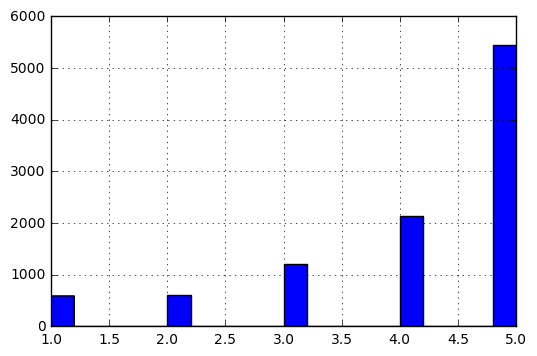

In [7]:
#2.a.1 Graph: Distribution of Ratings
df["overall"].hist(bins=20)

#### Analysis: We learn that reviews are skewed towards 5.0 ratings.

#### 2.a.2) Distribution of Helpfulness

Helpfulness can be derived from the column "helpful". For e.g. in row 0, helpful = [9,11]. This means 9 out of 11 reviews were helpful.

Since there exists no bound to the values of helpfulness, we will resort to normalization.
Let us think in what categories can we visualize the helpfulness dimension. 
- Binary : Helpful or Not helpful
- N-ary  : Helpful, Somewhat helpful, Not helpful, Missing

Since N-ary category is able to quantize more than Binary, we are going to choose N-ary.

Now, let us add the above mentioned 4 four categories.

In [401]:
#tag helpfulness to a category
def helpful_category(helpful_numerator, helpful_denominator):
    if not helpful_numerator:
        return '1) Missing'
    elif (not helpful_denominator) or (int(helpful_denominator)==0):
        return '1) Missing'
    else:
        div = float(helpful_numerator)/float(helpful_denominator)
        if div > 0.75:
            return '4) > 75%'
        elif div > 0.25:
            return '3) 25 to 75%'
        else:
            return '2) 0 to 25%'

def helpful_category_equals(input_category, expected_category):
    if input_category==expected_category:
        return 1
    else:
        return 0
    
s = df['helpful'].apply(lambda x: x.split(','))
df['helpful_numerator'] = s.apply(lambda x: x[0].replace('[',''))
df['helpful_denominator'] = s.apply(lambda x: x[1].replace(']',''))  
df['helpful_category'] = df[['helpful_numerator','helpful_denominator']].apply(lambda x: helpful_category(*x), axis=1)
df['helpful > 75%'] = df['helpful_category'].apply(lambda x: helpful_category_equals(x, '4) > 75%'))
df['helpful 25-75%'] = df['helpful_category'].apply(lambda x: helpful_category_equals(x,'3) 25 to 75%'))
df['helpful < 25%'] = df['helpful_category'].apply(lambda x: helpful_category_equals(x,'2) 0 to 25%'))
df['helpful Missing'] = df['helpful_category'].apply(lambda x: helpful_category_equals(x,'1) Missing'))

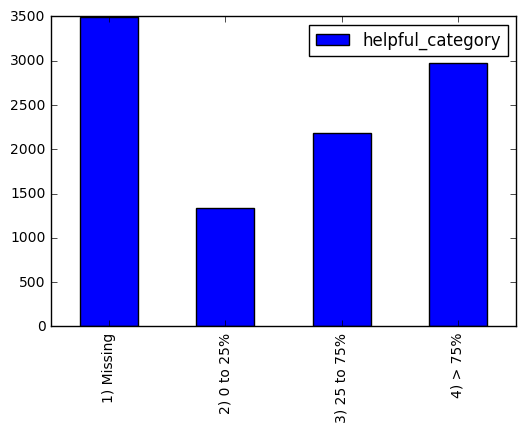

In [402]:
#2.a.2 Graph: Distribution of Helpfulness
df['helpful_category'].value_counts().sort_index().plot(kind="bar", legend=True)

#### Analysis: Similar to ratings, the helpfulnenss is skewed towards > 75%

#### 2.a.3) Distribution of Sentiments
Wait a minute, sentiment information is not a part of our dataset YET. But we have "reviewText" which can be used to derive the sentiment information. 

I chose AFINN sentiment analysis. AFINN sentiment analysis is a word list based approach. Here each word is mapped to an integer score. 

A naive way to compute sentiment would be to sum up the score for each word. However this approach is susceptible to extreme sentiments from a particular sentence inside the "reviewText". I would suggest exploring sentence based sentiment computation.

To keep it simple, we are going to stick to naive computation. Here, we are going to compute positive score and negative score for each "reviewText", and pick the dominating sentimenet score.

Similar to helpfulness, there would exist no bound to the values of "dominating sentiment score", we will resort to normalization. Let us think in what categories can we visualize the helpfulness dimension. 
- Binary : Positive or Negative
- N-ary  : <-50, -50 to 0, 0 to 50, 50 to 100, >100

Since N-ary category is able to quantize more than Binary, we are going to choose N-ary.

Now, let us add the above mentioned 5 categories.

In [377]:
#Load AFINN word list into a dictionary
sentiment_dictionary = {}

for line in open("/Users/rohitjoshi/thinkful/data-science-prep/AFINN-111.txt"):
    word,score = line.split("\t")
    sentiment_dictionary[word]=int(score)

In [378]:
def word_count(text):
    count = 0
    for word in word_tokenize(text):
        count+=1
    return count

df['review_word_count'] = df['reviewText'].ix[:].apply(lambda x: word_count(x))

In [379]:
#Compute positive and negative sentiment score
def afinn_score_simple(text):
    pos = 0
    neg = 0
    for word in word_tokenize(text):
        score = sentiment_dictionary.get(word, 0)
        if score > 0:
            pos+=score
        if score < 0:
            neg+=score
    return [pos, neg]

df['afinn_score'] = df['reviewText'].ix[:].apply(lambda x: afinn_score_simple(x))

In [380]:
#Pick the dominating sentiment score
def dominating_score(afinn_score_simple):
    if abs(afinn_score_simple[0]) > abs(afinn_score_simple[1]):
        return afinn_score_simple[0]
    elif abs(afinn_score_simple[1]) > abs(afinn_score_simple[0]):
        return afinn_score_simple[1]
    else:
        return 0.0
    
df['dominating_afinn_score'] = df['afinn_score'].ix[:].apply(lambda x: int(dominating_score(x)))

In [381]:
#tag the dominating sentiment score to a category
def sentiment_category(dominating_afinn_score):
    if dominating_afinn_score >100:
        return '5) > 100'
    elif dominating_afinn_score >50:
        return '4) 50 to 100'
    elif dominating_afinn_score >0:
        return '3) 0 to 50'
    elif dominating_afinn_score >-50:
        return '2) -50 to 0'
    else:
        return '1) < -50'
    
def sentiment_category_equals(input_category, expected_category):
    if input_category==expected_category:
        return 1
    else:
        return 0
    
df['sentiment category'] = df['dominating_afinn_score'].apply(lambda x: sentiment_category(x))
df['sentiment category < -50'] = df['sentiment category'].apply(lambda x: sentiment_category_equals(x, '1) < -50'))
df['sentiment category < -50 to 0'] = df['sentiment category'].apply(lambda x: sentiment_category_equals(x, '2) -50 to 0'))
df['sentiment category < 0 to 50'] = df['sentiment category'].apply(lambda x: sentiment_category_equals(x, '3) 0 to 50'))
df['sentiment category < 50 to 100'] = df['sentiment category'].apply(lambda x: sentiment_category_equals(x, '4) 50 to 100'))
df['sentiment category > 100'] = df['sentiment category'].apply(lambda x: sentiment_category_equals(x, '5) > 100'))


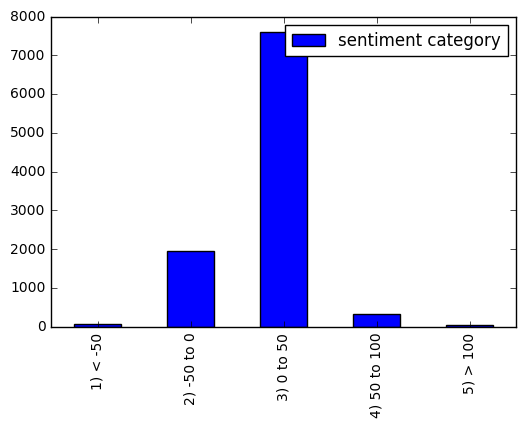

In [382]:
#2.a.3 Graph: Distribution of sentiments
df['sentiment category'].value_counts().sort_index().plot(kind="bar", legend=True)

#### Analysis: The dominating sentiment score is skewed towards "0 to 50"

### 2.b. In this section we are going to study correlation between Helpfulness and (Rating, Sentiment)

#### 2.b.1 Let us visualize Helpfulness for each Rating.

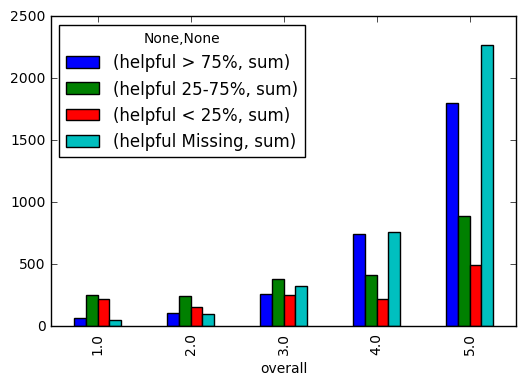

In [403]:
#2.b.1 Graph: Helpfulness for each Rating
rating_vs_helpfulness=df[['overall','helpful > 75%','helpful 25-75%','helpful < 25%','helpful Missing']].groupby('overall').agg(['sum'])
rating_vs_helpfulness.plot(kind='bar')

#### Analysis: Helpfulness seems to be skewed with rating. In order to remove the bias which may have been introduced due to ratings, we should re-sample the "rating_vs_helpfulness" dataFrame to contain equal number of reviews for each rating.

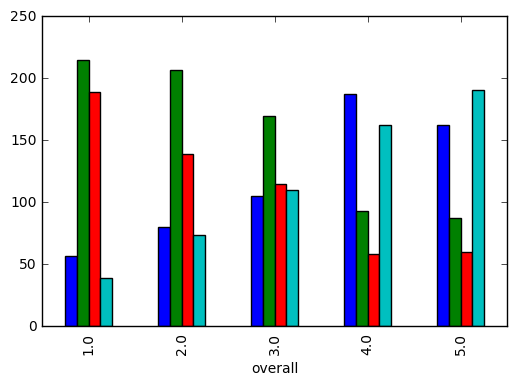

In [404]:
#2.b.1 Revised Graph: Helpfulness for each Rating
rating_vs_helpfulness_uniform_groupBy=df[['overall','helpful > 75%','helpful 25-75%','helpful < 25%','helpful Missing']].groupby('overall')
rating_vs_helpfulness_uniform = rating_vs_helpfulness_uniform_groupBy.head(500).groupby('overall').agg(['sum'])
rating_vs_helpfulness_uniform.plot(kind='bar',legend=False)

#### Analysis: We see that helpfulness is no longer skewed. However, the helpfulness intensity is still seen to be rising with rating. 

#### 2.b.2) Let us visualize Helpfulness for each Sentiment
Similar to 2.b.1, we will focus on resampling the dataFrame to contain equal number of reviews for each Sentiment category.

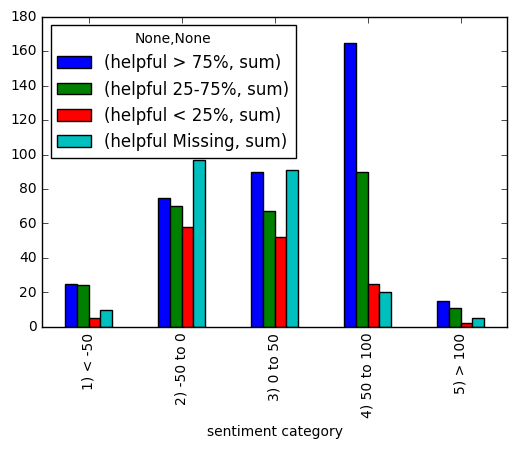

In [410]:
#2.b.2 Graph: Helpfulness for each Sentiment
sentiment_vs_helpfulness_uniform_groupBy=df[['sentiment category','helpful > 75%','helpful 25-75%','helpful < 25%','helpful Missing']].groupby('sentiment category')
sentiment_vs_helpfulness_uniform = sentiment_vs_helpfulness_uniform_groupBy.head(300).groupby('sentiment category').agg(['sum'])
sentiment_vs_helpfulness_uniform
sentiment_vs_helpfulness_uniform.plot(kind='bar',legend=True)

#### Analysis: Reviews with positive sentiment are more helful. Reviews with negative sentiment seem to be neutral.

### 2.c In this section we are going to study correlation between WordCount and (Rating, Sentiment)

#### 2.c.1 Let us visualize WordCount for each Rating.

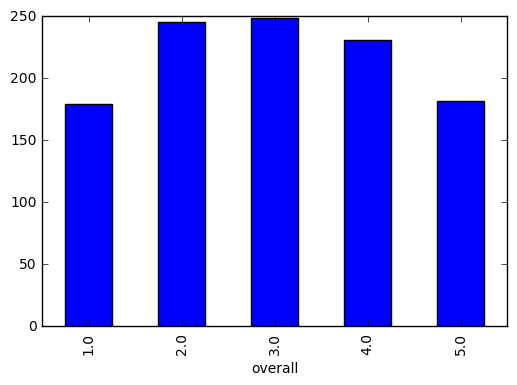

In [388]:
#2.c.1 Graph: Word count for each Rating
rating_vs_wc_uniform_groupBy = df[['overall','review_word_count']].groupby('overall')
rating_vs_wc_uniform = rating_vs_wc_uniform_groupBy.head(500).groupby('overall').agg(['mean'])
rating_vs_wc_uniform.plot(kind='bar',legend=False)

#### Analysis: Reviews with Rating 2,3 and 4 are more verbose. Whereas with Rating 1 and 5 are concise.

#### 2.c.2 Let us visualize WordCount for each Sentiment Category.

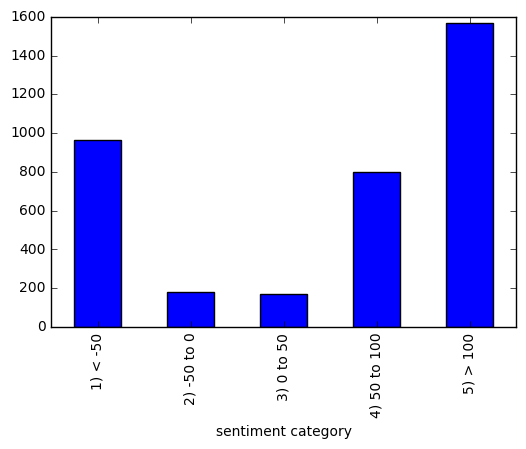

In [390]:
#2.c.2 Graph: WordCount for each Sentiment Category
sentiment_vs_wc_uniform_groupBy = df[['sentiment category','review_word_count']].groupby('sentiment category')
sentiment_vs_wc_uniform = sentiment_vs_wc_uniform_groupBy.head(300).groupby('sentiment category').agg('mean')
sentiment_vs_wc_uniform.plot(kind='bar',legend=False)

#### Analysis: Reviews with extreme sentiments are verbose. Whereas with somewhat positive and negative sentiments are concise.

### 2.d In this section we are going to study correlation between Sentiment and Rating

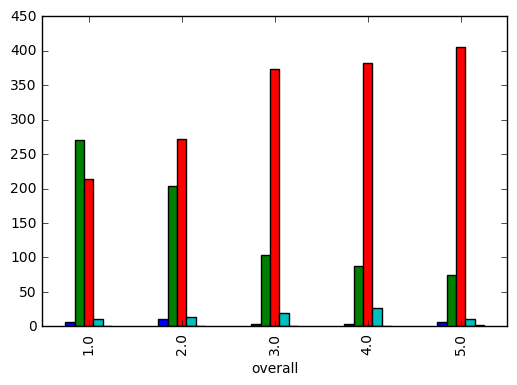

In [412]:
#2.d Graph: Sentiment category for each Rating
sentiment_vs_rating_uniform_groupBy = df[['overall','sentiment category < -50',
                         'sentiment category < -50 to 0',
                         'sentiment category < 0 to 50',
                         'sentiment category < 50 to 100',
                         'sentiment category > 100']].groupby('overall')
sentiment_vs_rating_uniform=sentiment_vs_rating_uniform_groupBy.head(500).groupby('overall').agg(['sum'])
sentiment_vs_rating_uniform.plot(kind='bar',legend=False)

#### Analysis: Reviews tend to become more positive with Rating.

### 3) Let us talk about further research

I would like to explore three main verticals
1. Interactive Visualization: incorporate bokeh.
2. Deeper Statistical Analysis: like regression.
3. Deeper Sentiment Analysis: sentence based analysis.
4. Predictive Analysis: machine learning based analysis.

For questions, please contact rohitjoshi@ucla.edu

Cheers,
Rohit